# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Import the OpenWeatherMap API key
from api_keys import open_weather_api

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

np.random.seed(1234)

# pull out any values within the ranges made above, we want 1500 values total
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 590
['adamstown', 'jinghong', 'taulaga', 'bethel', 'gaspe', 'constantia', 'tsiombe', 'berezovyy', 'iskateley', 'port mathurin', 'abepura', 'nagqu', 'shelbyville', 'jamestown', 'taiohae', 'garissa', 'port-aux-francais', 'kodiak', 'isafjordur', 'walvis bay', 'zhanjiang', 'waitangi', 'hammerfest', 'idri', 'ripky', 'margaret river', 'mejit', 'ta`u', 'schonkirchen', 'port alfred', "la'ie", 'gilgit', 'yellowknife', 'west island', 'olonkinbyen', 'ushuaia', 'grytviken', 'san felipe', 'guerrero negro', 'akropong', 'crane', 'san jose de feliciano', 'san antonio de pale', 'edinburgh of the seven seas', 'saint-francois', 'coahuayana de hidalgo', 'puerto natales', 'al jawf', 'saudarkrokur', 'shimanovsk', 'ust-nera', 'tiksi', 'klyuchi', 'pandaria', 'kindu', 'port elizabeth', 'uturoa', 'albany', 'yuzhno-kurilsk', 'markapur', 'east london', 'ilulissat', 'flying fish cove', 'mata-utu', 'saipan', 'haiku-pauwela', 'yamada', 'nayoro', 'la ronge', 'stanley', 'puerto san carlos

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + open_weather_api

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    #is i divisable by 50 amd the number is greater tha 50, then increment the set
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
     #make a request to the API and parse the json response
        city_weather = requests.get(city_url).json()

        # access the specific fields from the JSON object, for ex: latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | jinghong
Processing Record 3 of Set 1 | taulaga
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | gaspe
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | tsiombe
Processing Record 8 of Set 1 | berezovyy
Processing Record 9 of Set 1 | iskateley
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | abepura
Processing Record 12 of Set 1 | nagqu
Processing Record 13 of Set 1 | shelbyville
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | garissa
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | walvis bay
Processing Record 21 of Set 1 | zhanjiang
Processing Record 22 of Set 1 | waitangi
Proces

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.98,81,100,5.96,PN,1731463570
1,jinghong,21.9910,100.7341,23.25,74,0,0.67,CN,1731463572
2,taulaga,-11.0553,-171.0883,28.77,71,1,7.25,AS,1731463573
3,bethel,41.3712,-73.4140,5.12,53,0,5.66,US,1731463574
4,gaspe,48.8334,-64.4819,0.12,64,75,8.23,CA,1731463493


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.98,81,100,5.96,PN,1731463570
1,jinghong,21.9910,100.7341,23.25,74,0,0.67,CN,1731463572
2,taulaga,-11.0553,-171.0883,28.77,71,1,7.25,AS,1731463573
3,bethel,41.3712,-73.4140,5.12,53,0,5.66,US,1731463574
4,gaspe,48.8334,-64.4819,0.12,64,75,8.23,CA,1731463493


### Create the Scatter Plots

#### Latitude Vs. Temperature

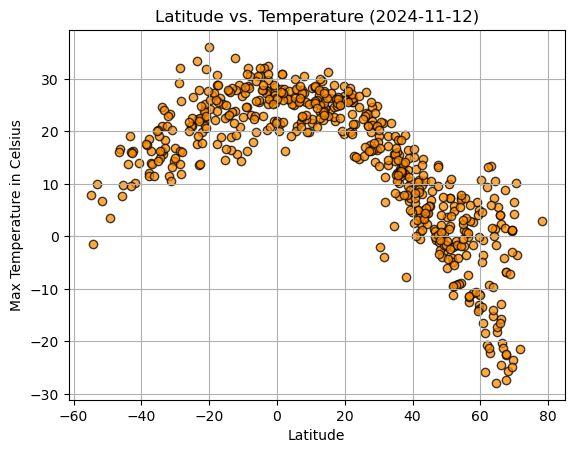

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    facecolor="darkorange",
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.75,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature in Celsius")
plt.grid(True)

# Save the figure
plt.savefig("Temp_vs_Lat.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

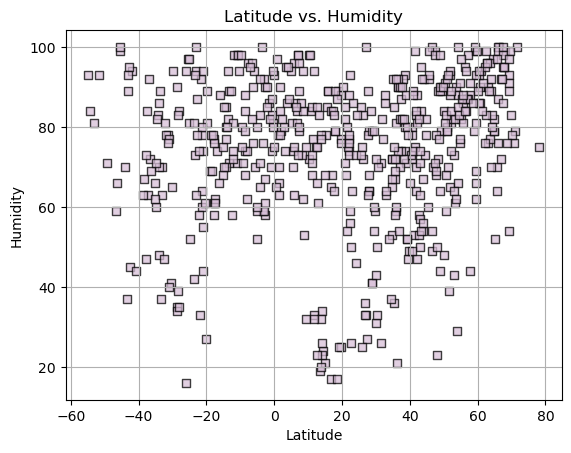

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    facecolor="thistle",
    edgecolor="black",
    marker="s",
    linewidths=1,
    alpha=0.75,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Lat.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

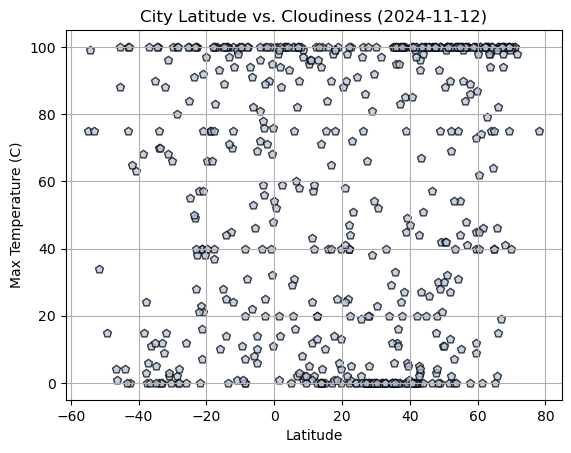

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    facecolor="lightsteelblue",
    edgecolor="black",
    marker="p",
    linewidths=1,
    alpha=0.75,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Lat.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

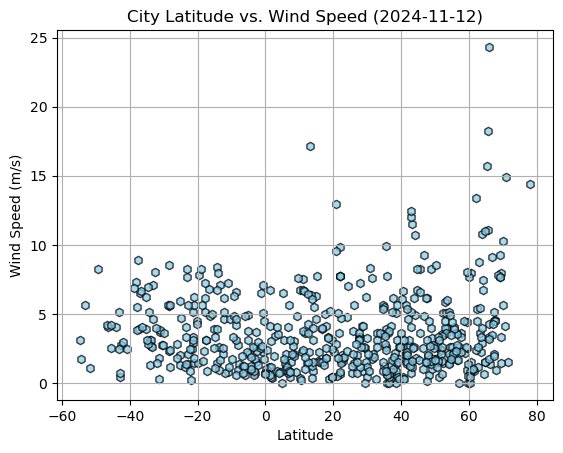

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    facecolor="skyblue",
    edgecolor="black",
    marker="h",
    linewidths=1,
    alpha=0.75,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Windspeed_vs_Lat.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))

    # plot the regression
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jinghong,21.9910,100.7341,23.25,74,0,0.67,CN,1731463572
3,bethel,41.3712,-73.4140,5.12,53,0,5.66,US,1731463574
4,gaspe,48.8334,-64.4819,0.12,64,75,8.23,CA,1731463493
5,constantia,44.1833,28.6500,4.38,92,100,4.95,RO,1731463576
7,berezovyy,51.6667,135.7000,-4.14,39,0,2.44,RU,1731463578


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.98,81,100,5.96,PN,1731463570
2,taulaga,-11.0553,-171.0883,28.77,71,1,7.25,AS,1731463573
6,tsiombe,-25.3000,45.4833,20.95,97,100,1.31,MG,1731463577
9,port mathurin,-19.6833,63.4167,24.34,81,66,7.80,MU,1731463581
10,abepura,-2.6333,140.5833,32.45,58,20,2.57,ID,1731463582


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.744045702842615


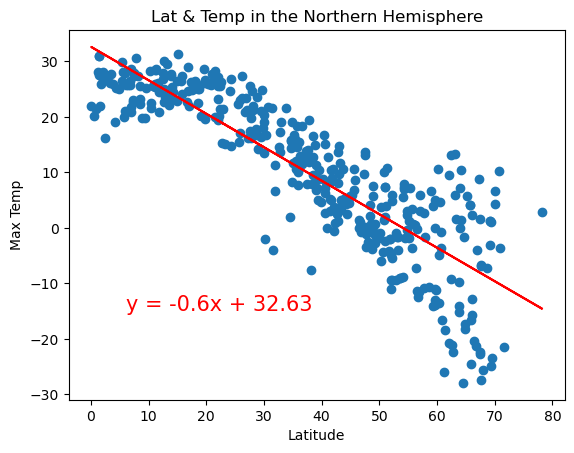

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Lat & Temp in the Northern Hemisphere")
plot_linear_regression(x_values, y_values, "Max Temp", (6, -15))

The r-value is: 0.495650905161784


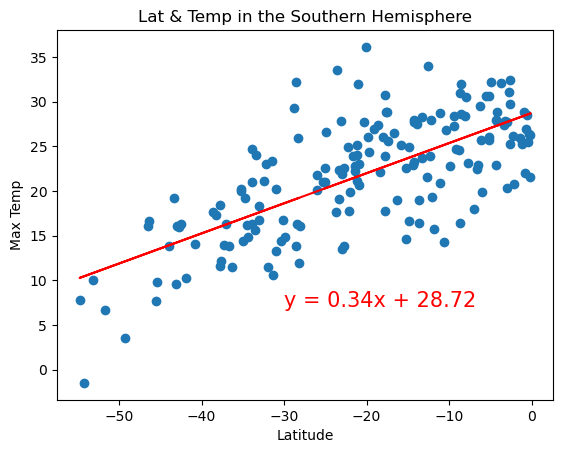

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Lat & Temp in the Southern Hemisphere")
plot_linear_regression(x_values, y_values, "Max Temp", (-30, 7))

**Discussion about the linear relationship:** In the plot showing the Northern Hemisphere we can see that, on average, as Latitude increases (moving away from the equator towards the poles) Temperature decreases. In the plot showing the Southern Hemisphere we can see that, on average, as Latitude decreases (moving from the poles towards the equator) the Temperature increases. In the Southern Hemisphere plot we can see that there is a larger degree of variability in the data points relative to the predicted values from the linear regression model. Both r-values, however, are positve. It will be interesting to see how these correlations change as the planets overall temperature gradually increases with Global Warming. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06203607870165168


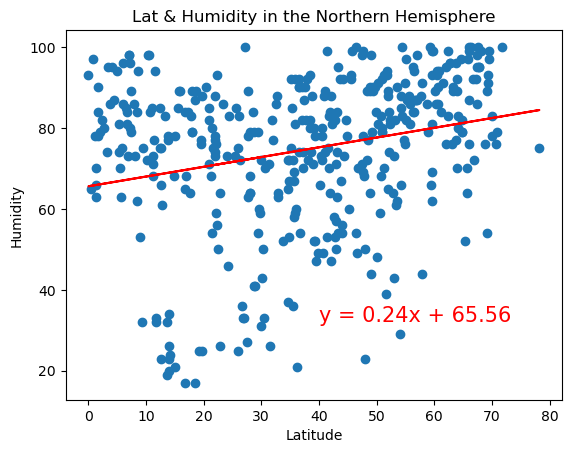

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Lat & Humidity in the Northern Hemisphere")
plot_linear_regression(x_values, y_values, "Humidity", (40, 32))

The r-value is: 0.02160136748185491


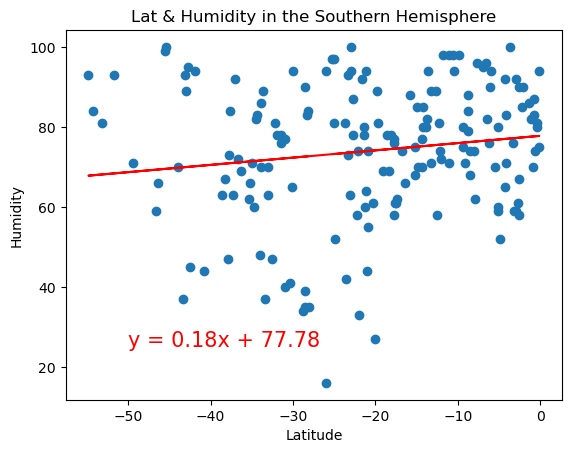

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title("Lat & Humidity in the Southern Hemisphere")
plot_linear_regression(x_values, y_values, "Humidity", (-50, 25))

**Discussion about the linear relationship:** Based on both the plots in the Northern Hemisphere and in the Southern Hemisphere, we can assume there is not a strong correlation between Latitude and Humidity. There is a slightly higher r-value for the correlation in the Northern Hemisphere. It does appear that in the Northern Hemisphere, as you move away from the Equator, more humid environments can be found. In the Southern Hemisphere there are more significant degrees of variabilty from the linear regression model. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.050500991841660486


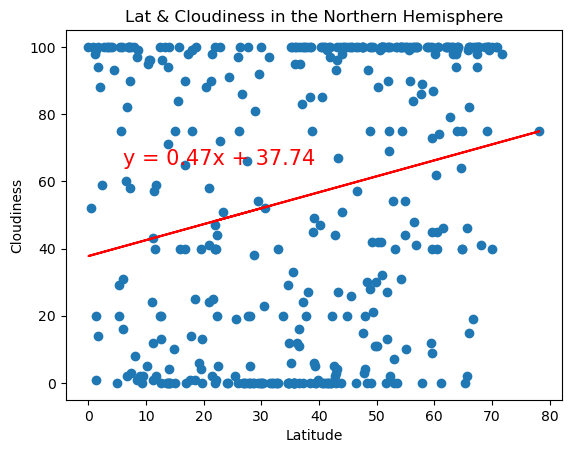

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("Lat & Cloudiness in the Northern Hemisphere")
plot_linear_regression(x_values, y_values, "Cloudiness", (6, 65))

The r-value is: 0.025500910679660142


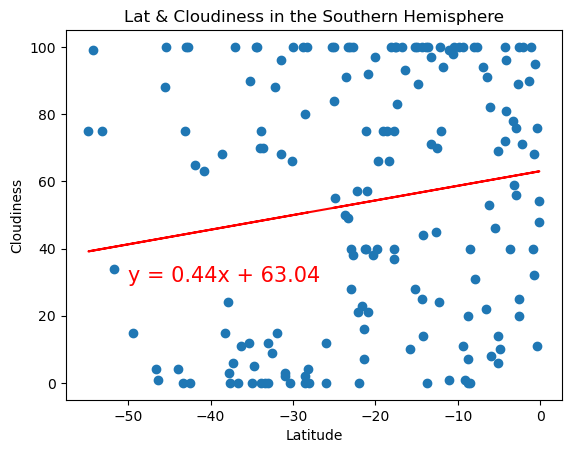

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Lat & Cloudiness in the Southern Hemisphere")
plot_linear_regression(x_values, y_values, "Cloudiness", (-50, 30))

**Discussion about the linear relationship:** Both r-values in the Northern and Southern Hemisphere plots are low, indiating there is not a strong correlation between Clouidness and Latitude. In both plots there are huge degrees in variability in the data points from the linear regression model. I dont think we could make any solid conlustions on the correlation between Cloudiness and Latitude based on this data.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0412870066112608


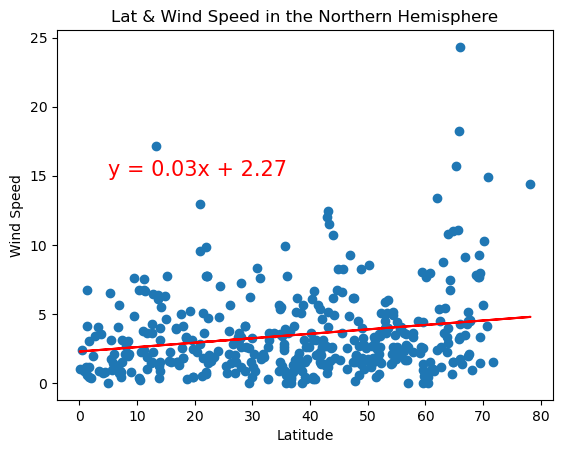

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Lat & Wind Speed in the Northern Hemisphere")
plot_linear_regression(x_values, y_values, "Wind Speed", (5, 15))

The r-value is: 0.03857049885939742


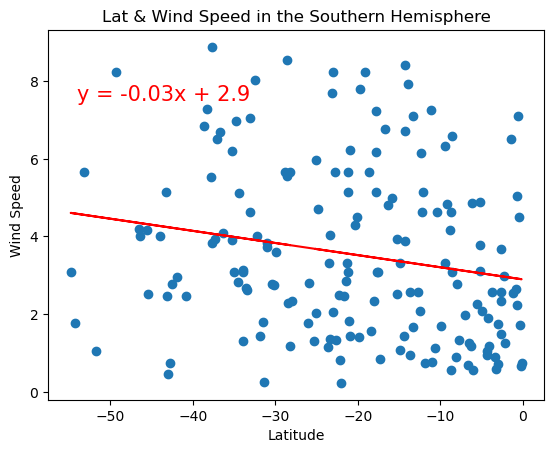

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Lat & Wind Speed in the Southern Hemisphere")
plot_linear_regression(x_values, y_values, "Wind Speed", (-54, 7.5))

**Discussion about the linear relationship:** Again both r-values are low for this plots, indicating a weak relationship between Wind Speed and Latitude. However, in the Northern Hemisphere we see most of the data points clustered 10mph and under across a large range of latitudes, this shows us that for the northern hemisphere wind speed tends to be relatively low across a wide range of latitudes. I am unsure about whether this linear regression model is the right fit for this data, I don't neccessarily think that it is. As for the Southern Hemisphere, as well as having a low r-value, it appears that our data is widely scattered and doesnt follow a trend in this relationship, indicating that this model's predictions might be likely less accurate. 